In [9]:
#Importing All the Libraries as per the requirement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from datetime import datetime
pd.read_csv("NFLX.csv")


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
df = df=pd.read_csv("NFLX.csv")


In [10]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [11]:
#Objective 1 . To analyse Volume of stock traded 
sns.set(rc={'figure.figsize':(10,5)})

In [12]:
#Interchanging date with Index number 
df['Date']= pd.to_datetime(df['Date'])
df=df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Volume of Stock vs Time')

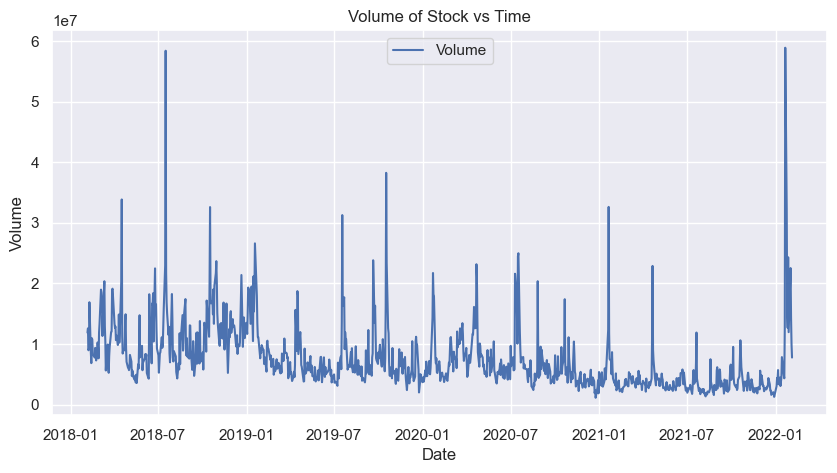

In [13]:
#We are plotting the graph of volume vs time to get the volume of stock traded .
sns.lineplot(x = df.index,y = df['Volume'],label = 'Volume')
plt.title('Volume of Stock vs Time')

<Axes: title={'center': 'Netflix Stock Price'}, xlabel='Date'>

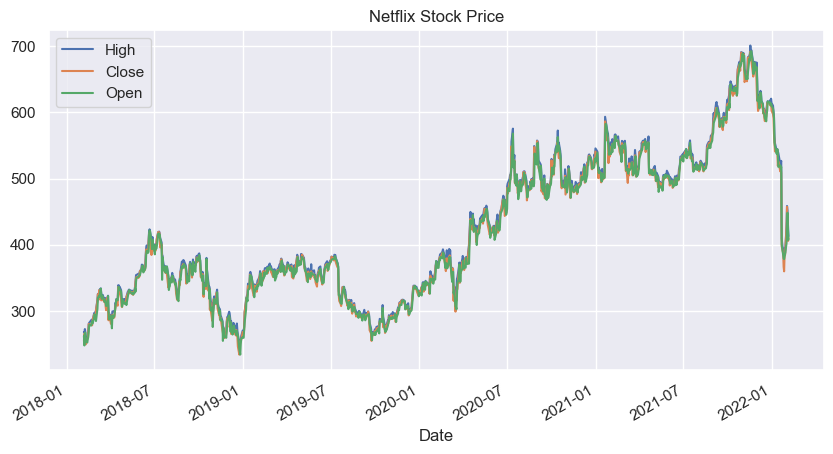

In [14]:
#Analysis - According to the data set the traded volume after July 2018 reached nearly to the same value in Jan 2022 . Within the previous time frame the stock trading was comperatively less or average .
#Objective 2 . To Analyse high low and open prices in a single graph
df.plot(y = ['High','Close','Open'],title = 'Netflix Stock Price')

<Axes: xlabel='Year'>

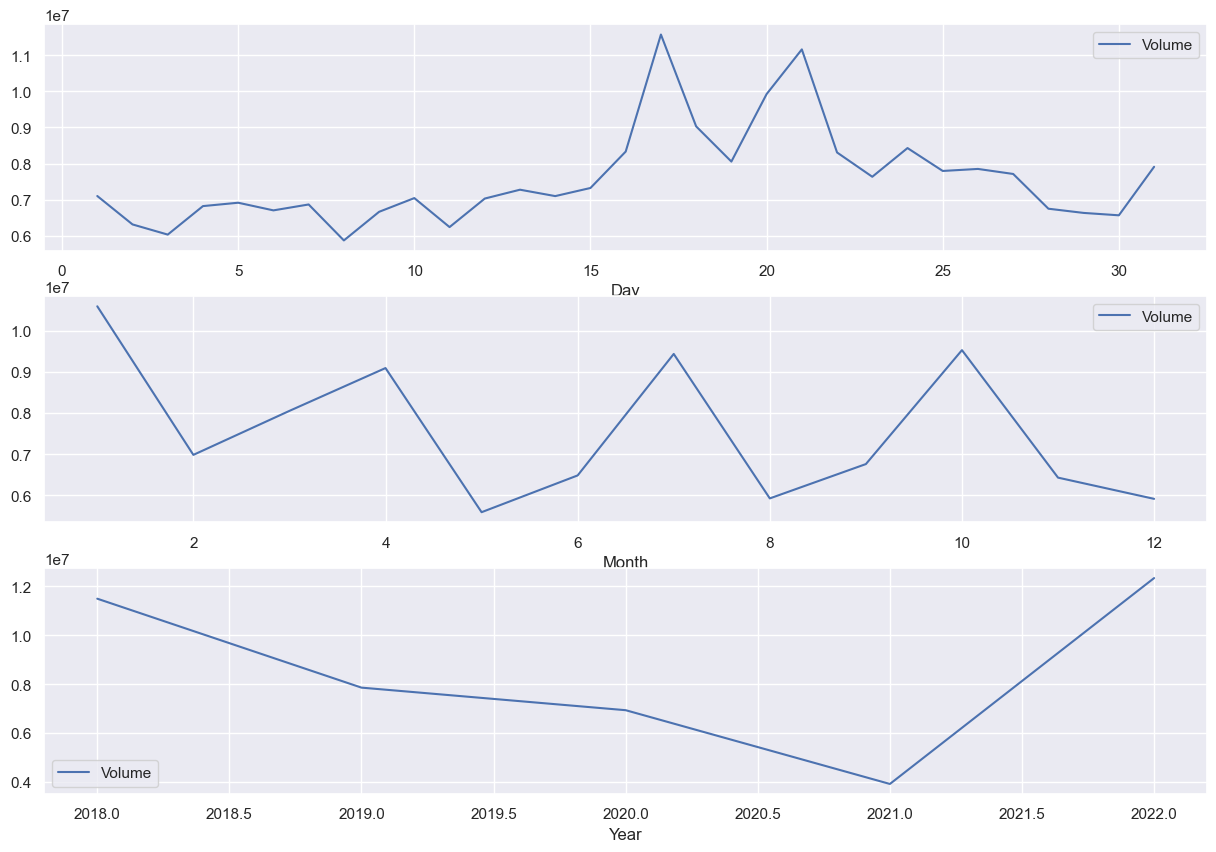

In [15]:
#Objective 3 . To displa day,month,yearly trend with volume using groupby
fig,(ax1,ax2,ax3)=plt.subplots(3,figsize=(15,10))
df.groupby(df.index.day).mean().plot(y='Volume',ax=ax1,xlabel='Day')
df.groupby(df.index.month).mean().plot(y='Volume',ax=ax2,xlabel='Month')
df.groupby(df.index.year).mean().plot(y='Volume',ax=ax3,xlabel='Year')

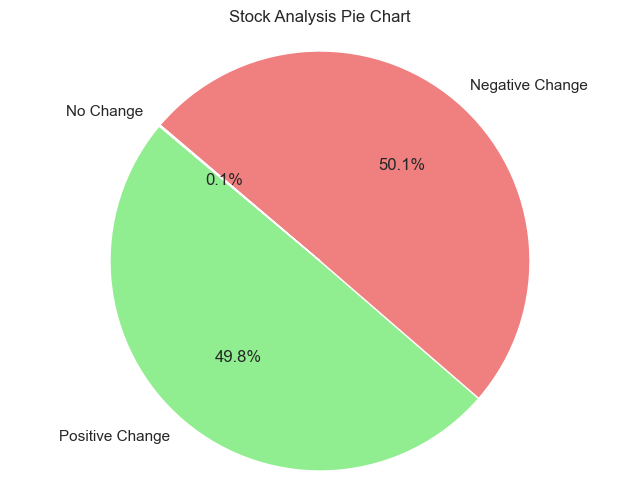

In [16]:
# Additional Analysis Using Chat GPT creating a Pie Chart
df['percentage_change'] = ((df['Close'] - df['Open']) / df['Open']) * 100

positive_change = df[df['percentage_change'] > 0]
negative_change = df[df['percentage_change'] < 0]
no_change = df[df['percentage_change'] == 0]

sizes = [len(positive_change), len(negative_change), len(no_change)]
labels = ['Positive Change', 'Negative Change', 'No Change']
colors = ['lightgreen', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Stock Analysis Pie Chart')
plt.show()

In [ ]:
#Netflix Stock Analysis is done and many other stocks can be analysed with this methods 
#AI tools can also be used provide correct prompt is feeded . I also used a bit of AI to get my insights and visuals.
​